In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('C:/Users/Preston Wong/Downloads/letter-recognition.data', delimiter=',', header=-1)
df2 = df.copy()
df = df.drop([0], axis=1)
df = df.join(df2[0])

In [3]:
X_and_Y = df.as_matrix()
np.random.shuffle(X_and_Y)
X_and_Y = X_and_Y[:5000, :17]
X = X_and_Y[:, 0:-1]
Y = X_and_Y[:, -1]
print(X_and_Y.shape, X.shape, Y.shape)

(5000, 17) (5000, 16) (5000,)


In [4]:
ordlist = []
for i in range(len(Y)):
    ordlist.append(ord(Y[i]))

In [5]:
for i in range(len(Y)):
    if ((ordlist[i]) >= 65 and (ordlist[i] <= 77)):
        Y[i] = 1
    else:
        Y[i] = 0

In [6]:
depth_list = []
for i in range(1, 21, 1):
    depth_list.append(i)
print(depth_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [7]:
classifier = RandomForestClassifier()
split_list = [2,4,6,8,12,16,20]
params = {'min_samples_split':split_list}
grid_search = GridSearchCV(classifier, params, return_train_score = True, cv=5)

In [8]:
def draw_heatmap_linear(acc, acc_desc, split_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=split_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='split')
    plt.title(acc_desc + ' w.r.t split')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

(4000, 16) (1000, 16) (4000,) (1000,)


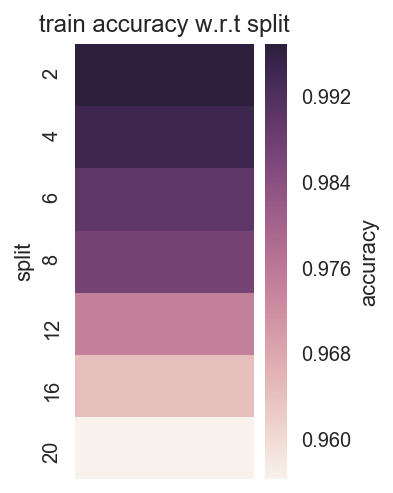

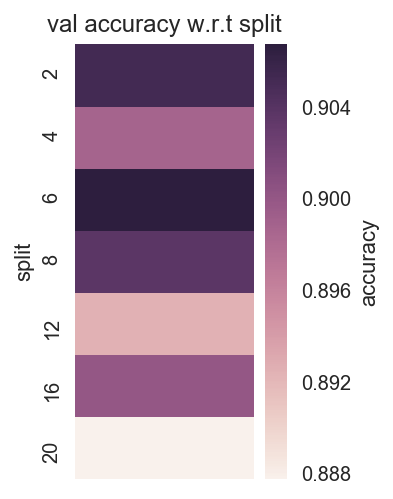

In [9]:
Y = Y.astype('int')
X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
grid_search.fit(X_train_val, Y_train_val)

train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', split_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', split_list)

In [10]:
test_acc = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc)
tot_train = (sum(train_acc)/len(train_acc))
print(tot_train)
tot_val = (sum(val_acc)/len(val_acc))
print(tot_val)

{'min_samples_split': 6}
0.907
[ 0.98053571]
[ 0.89925]


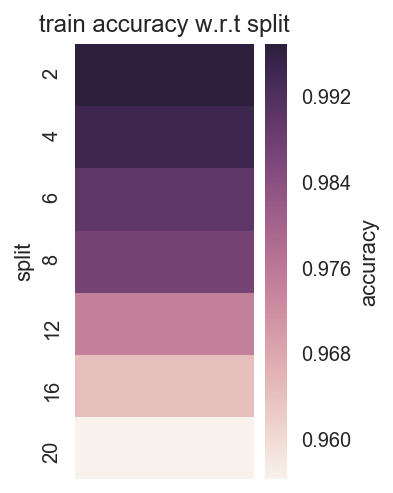

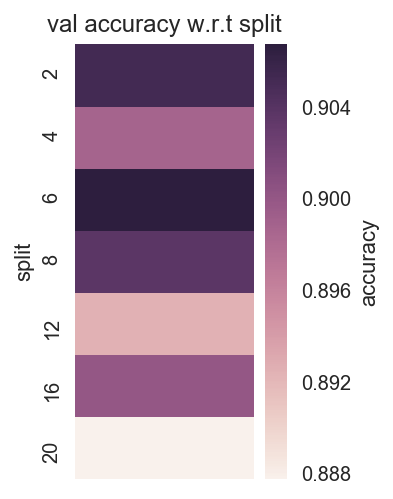

In [11]:
X_train_val = X[:int(0.5*len(X))] # Get features from train + val set.
X_test      = X[int(0.5*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.5*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.5*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc2 = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', split_list)

val_acc2 = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', split_list)

In [12]:
test_acc2 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc2)
tot_train2 = (sum(train_acc2)/len(train_acc2))
print(tot_train2)
tot_val2 = (sum(val_acc2)/len(val_acc2))
print(tot_val2)

{'min_samples_split': 4}
0.9052
[ 0.9761428]
[ 0.87765714]


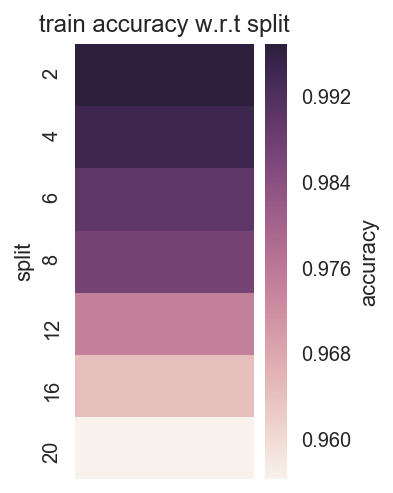

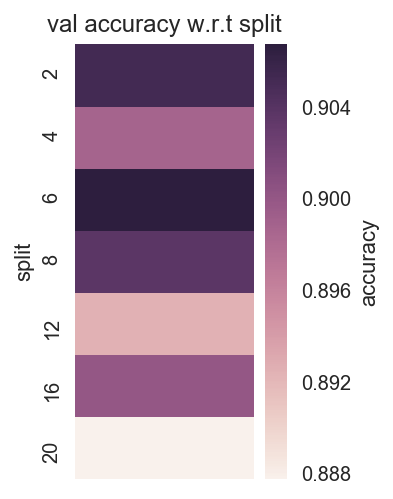

In [13]:
X_train_val = X[:int(0.2*len(X))] # Get features from train + val set.
X_test      = X[int(0.2*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.2*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.2*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc3 = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', split_list)

val_acc3 = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', split_list)

In [14]:
test_acc3 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc3)
tot_train3 = (sum(train_acc3)/len(train_acc3))
print(tot_train3)
tot_val3 = (sum(val_acc3)/len(val_acc3))
print(tot_val3)

{'min_samples_split': 4}
0.84675
[ 0.96803509]
[ 0.83157143]


In [15]:
avg_test = (test_acc + test_acc2 + test_acc3)/3
avg_train = sum(tot_train + tot_train2 + tot_train3)/3
avg_val = sum(tot_val + tot_val2 + tot_val3)/3
print(avg_test, avg_train, avg_val)

0.886316666667 0.974904537039 0.869492857143
